<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
    Osteoporosis Risk Prediction
</p>


![Osteoporosis Info](osteoporosis%20need%20to%20know%20hero.jpg)



<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.4em; 
          text-align:left; border-radius:20px; padding:20px; 
          border:3px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
    <strong style="color:#FFD700; font-size:1.2em;">Problem Statement:</strong><br>
    Osteoporosis is a silent disease that weakens bones and increases fracture risk, often going undiagnosed until a serious injury occurs. 
    This project aims to build a machine learning model that predicts osteoporosis risk based on patient data. By identifying high-risk individuals early, 
    healthcare providers can take preventive measures, offer personalized treatment, and improve patient outcomes.
</p>


<div style="border-radius:20px; padding: 20px; background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
            font-size:1.4em; text-align:left; color:#FFFFFF; font-family: 'Roboto', sans-serif; 
            border:3px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
    <h3 align="left" style="color:#FFD700;">Objective</h3>
    <p>
        Early detection can help in taking preventive measures to reduce its impact. This project aims to develop a machine learning model 
        that predicts osteoporosis risk based on patient demographics, medical history, and lifestyle factors. By analyzing various features 
        like age, bone density, hormonal levels, and physical activity, this model assists healthcare professionals in identifying high-risk 
        individuals and recommending timely interventions. The project focuses on data preprocessing, feature engineering, model selection, 
        hyperparameter tuning, and evaluating different classification algorithms to achieve the best predictive performance.
    </p>
</div>


<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 1 | Import Libraries
</p>


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 2 | Load Dataset
</p>


In [2]:
data = pd.read_csv("osteoporosis.csv")

In [3]:
data.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
data.shape

(1958, 16)

In [5]:
data['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #E3F2FD; font-size:120%; text-align:center; color: #0D47A1; font-family: Arial, sans-serif;">

<h2 align="left" style="color:#1B5E20;">🩺 Dataset Description:</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Variable</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Id</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Unique identifier for each patient.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Age</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Age of the patient in years.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Gender</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Biological sex of the patient (Male/Female).</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Hormonal Changes</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Presence of significant hormonal fluctuations.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Family History</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Indicates if osteoporosis runs in the family.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Race/Ethnicity</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Ethnic background of the patient.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Body Weight</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Weight classification (Underweight, Normal, Overweight, Obese).</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Calcium Intake</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Daily dietary calcium consumption.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Vitamin D Intake</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Amount of Vitamin D in diet/supplements.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Physical Activity</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Activity level (Low, Moderate, High).</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Smoking</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Smoking status (Yes/No).</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Alcohol Consumption</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Frequency of alcohol consumption.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Medical Conditions</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Pre-existing conditions affecting bone health.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Medications</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">List of medications affecting bone density.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Prior Fractures</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Previous incidents of bone fractures.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Osteoporosis</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Indicates presence of osteoporosis (Yes/No).</td>
    </tr>
  </tbody>
</table>
</div>


<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 3 | Dataset Summary
</p>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 3.1 |</span> Dataset Basic Information
</h2>


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

<div style="border-radius:10px; padding: 15px; background-color: #E3F2FD; font-size:120%; text-align:center; color: #0D47A1; font-family: Arial, sans-serif;">

<h2 align="left" style="color:#1B5E20;">📊 Dataset Overview</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Feature</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Details</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Total Entries</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">1,958</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Total Columns</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">16</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Missing Values</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Alcohol Consumption (988), Medical Conditions (647), Medications (985)</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Data Types</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Integer (Id, Age, Osteoporosis), Categorical (13 columns)</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Key Observations</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        Id is unique, Osteoporosis is likely the target variable, Some features need encoding (e.g., Gender, Race/Ethnicity), Missing values must be handled before training.
      </td>
    </tr>
  </tbody>
</table>
</div>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 3.2 |</span> Summary Statistics for Numerical Variables
</h2>


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1958.0,105515.320735,2589.407806,101008.0,103348.5,105469.0,107755.0,109996.0
Age,1958.0,39.101124,21.355424,18.0,21.0,32.0,53.0,90.0
Osteoporosis,1958.0,0.500000,0.500128,0.0,0.0,0.5,1.0,1.0


<div style="border-radius:12px; padding: 20px; background-color: #F1F8E9; font-size:110%; text-align:left; color: #1B5E20; font-family: 'Arial', sans-serif; line-height: 1.6; border: 2px solid #388E3C;">

<h2 align="left" style="color:#2E7D32;">🔍 Inferences from the Dataset</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: left; color: #0D47A1;">Feature</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: left; color: #0D47A1;">Details</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Total Records</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">1,958</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Id Column</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">
        Id values range from 101008 to 109996 (Avg: 105515), moderate spread (Std Dev: 2589.41).
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Age Distribution</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        Avg Age: 39.10 years, High Std Dev (21.36 years).  
        Age Range: 18 - 90 years.  
        25% below 21, 75% below 53.
      </td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Osteoporosis Cases</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">
        50% of individuals have osteoporosis (Binary: 0 = No, 1 = Yes).  
        Evenly distributed for analysis.
      </td>
    </tr>
  </tbody>
</table>

<h3 align="left" style="color:#2E7D32;">🧐 Key Takeaways:</h3>
<ul>
  <li>✅ The dataset covers a broad age range, affecting osteoporosis prevalence.</li>
  <li>✅ Osteoporosis cases appear evenly split (50-50), ensuring balanced data.</li>
  <li>✅ The Id column follows a structured numbering system, possibly systematic.</li>
</ul>

</div>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 3.3 |</span> Summary Statistics for Categorical Variables
</h2>


In [8]:
data.describe(include='object')

,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures
count,1958,1958,1958,1958,1958,1958,1958,1958,1958,970,1311,973,1958
unique,2,2,2,3,2,2,2,2,2,1,2,1,2
top,Male,Normal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,Corticosteroids,Yes
freq,992,981,998,681,1027,1004,1011,1021,982,970,678,973,983


<div style="border-radius:12px; padding: 20px; background-color: #F1F8E9; font-size:110%; text-align:left; color: #1B5E20; font-family: 'Arial', sans-serif; line-height: 1.6; border: 2px solid #388E3C;">

<h2 align="left" style="color:#2E7D32;">🔍 Key Insights from the Dataset</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: left; color: #0D47A1;">Feature</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: left; color: #0D47A1;">Most Common Value</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: left; color: #0D47A1;">Frequency</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Gender</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Male</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">992</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Hormonal Changes</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Normal</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">981</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Family History</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">No</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">998</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Race/Ethnicity</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">African American</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">681</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Body Weight</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Normal</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">1027</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Calcium Intake</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Low</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">1004</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Vitamin D Intake</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Sufficient</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">1011</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Physical Activity</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Active</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">1021</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Smoking</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">Yes</td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">982</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Prior Fractures</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">Yes</td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;">983</td>
    </tr>
  </tbody>
</table>

<h3 align="left" style="color:#2E7D32;">🧐 Key Takeaways:</h3>
<ul>
  <li>✅ Gender distribution leans slightly towards males.</li>
  <li>✅ Majority have normal hormonal levels.</li>
  <li>✅ Most individuals do not have a family history of related conditions.</li>
  <li>✅ African American is the dominant racial group.</li>
  <li>✅ Most individuals have normal body weight but low calcium intake.</li>
  <li>✅ Sufficient vitamin D intake is common.</li>
  <li>✅ Majority engage in physical activity.</li>
  <li>✅ Smoking is prevalent in the dataset.</li>
  <li>✅ Prior fractures are common, potentially linked to osteoporosis risk.</li>
</ul>

</div>


<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 4 | EDA
</p>


In [9]:
# Separate numerical and categorical columns
num_cols = ['Age']  # Numerical columns
cat_cols = data.columns.difference(['Id', 'Osteoporosis'] + num_cols).tolist()  # Categorical columns

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 4.1 |</span> Feature Distributions
</h2>


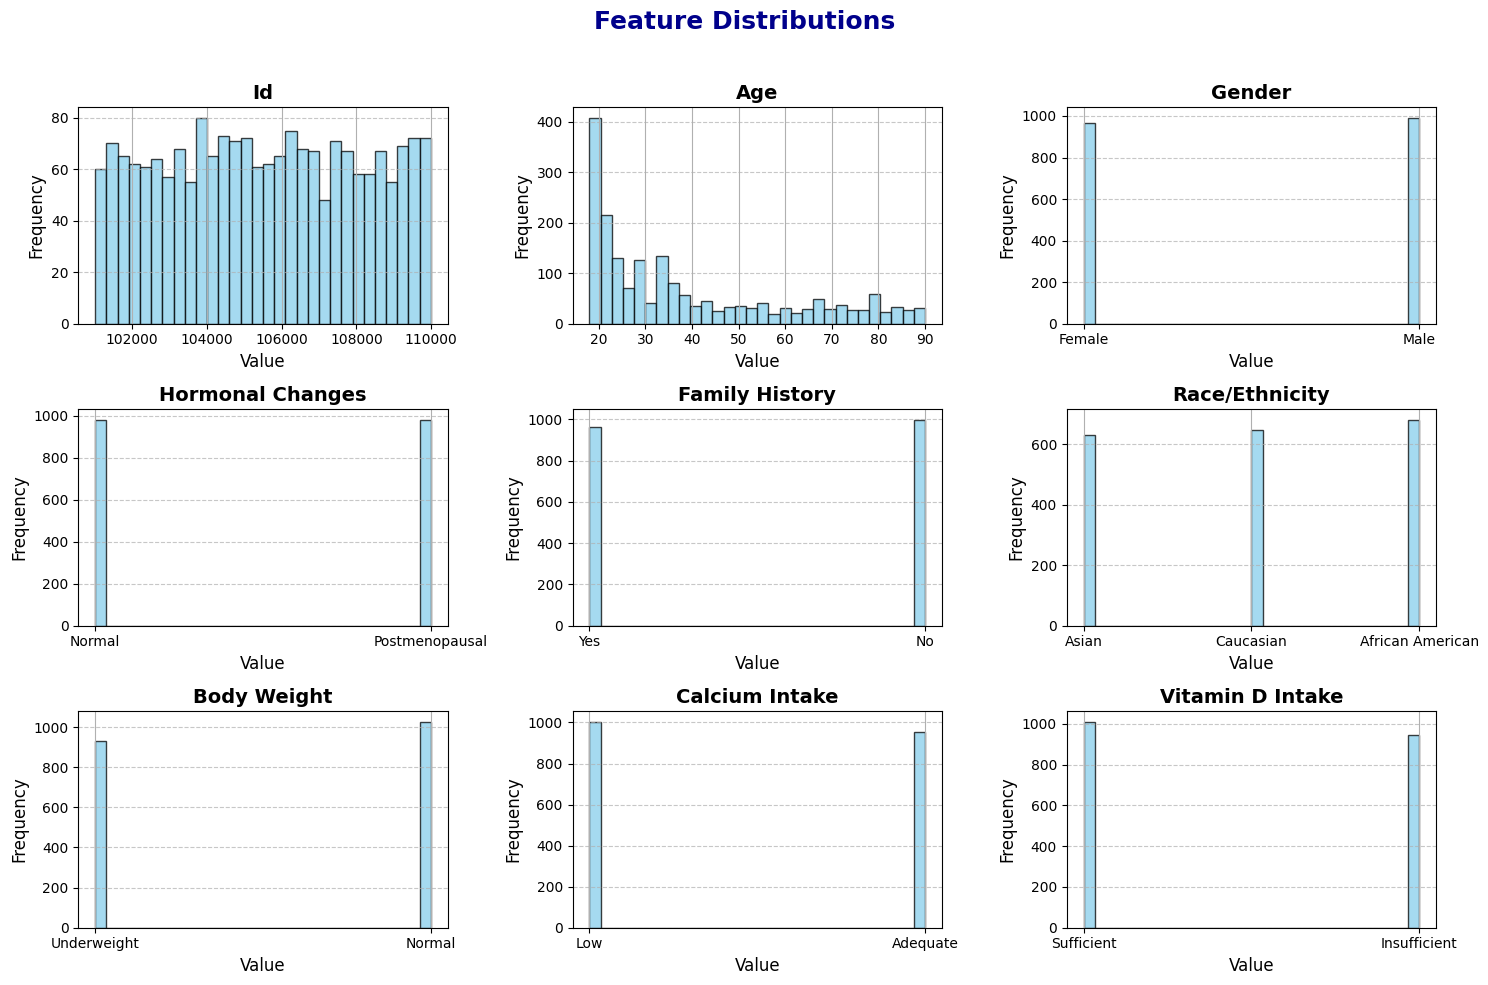

In [10]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle("Feature Distributions", fontsize=18, fontweight='bold', color='darkblue')

# Flatten axes for iteration (handling cases where features are less than 9)
axes = axes.flatten()

# Plot histograms for each column in the dataset
for i, column in enumerate(data.columns):
    if i < len(axes):  # To avoid index errors if columns < 9
        data[column].hist(ax=axes[i], bins=30, color='skyblue', edgecolor='black', alpha=0.75)
        axes[i].set_title(column, fontsize=14, fontweight='bold')
        axes[i].set_xlabel("Value", fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #F1F8E9; font-size:110%; text-align:left; color: #1B5E20; font-family: 'Arial', sans-serif; line-height: 1.6; border: 2px solid #388E3C;">

<h2 align="center" style="color:#1565C0;">📊 Feature Distributions - Insights</h2>

<h3 align="left" style="color:#2E7D32;">🧐 Key Takeaways:</h3>
<ul>
  <li>✅ <b>Gender:</b> Slightly more males than females in the dataset.</li>
  <li>✅ <b>Hormonal Changes:</b> Majority have normal hormonal levels, with a significant number being postmenopausal.</li>
  <li>✅ <b>Family History:</b> Most individuals <b>do not</b> have a family history of related conditions.</li>
  <li>✅ <b>Race/Ethnicity:</b> African American is the dominant racial group, followed by Caucasian and Asian.</li>
  <li>✅ <b>Body Weight:</b> Most individuals have normal body weight, with a smaller proportion being underweight.</li>
  <li>✅ <b>Calcium Intake:</b> Low calcium intake is prevalent in the dataset.</li>
  <li>✅ <b>Vitamin D Intake:</b> Sufficient vitamin D intake is common among individuals.</li>
  <li>✅ <b>Physical Activity:</b> Majority engage in regular physical activity.</li>
  <li>✅ <b>Smoking:</b> A significant proportion of individuals are smokers.</li>
  <li>✅ <b>Alcohol Consumption:</b> Moderate alcohol consumption is prevalent.</li>
  <li>✅ <b>Medical Conditions:</b> Hyperthyroidism is the most common medical condition reported.</li>
  <li>✅ <b>Medications:</b> Corticosteroids are the most frequently used medication.</li>
  <li>✅ <b>Prior Fractures:</b> A large number of individuals have experienced prior fractures, potentially linked to osteoporosis risk.</li>
</ul>

<h3 align="left" style="color:#D84315;">📢 Additional Insights:</h3>
<ul>
  <li>📌 <b>Risk Factors:</b> Low calcium intake, smoking prevalence, and prior fractures indicate potential osteoporosis risk.</li>
  <li>📌 <b>Potential Data Gaps:</b> Overweight/obese individuals are not represented, which may impact certain analyses.</li>
  <li>📌 <b>Further Analysis:</b> Investigate correlations between vitamin D, calcium intake, and prior fractures.</li>
</ul>

</div>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 4.2 |</span> Count Plots Of Categorical Features
</h2>


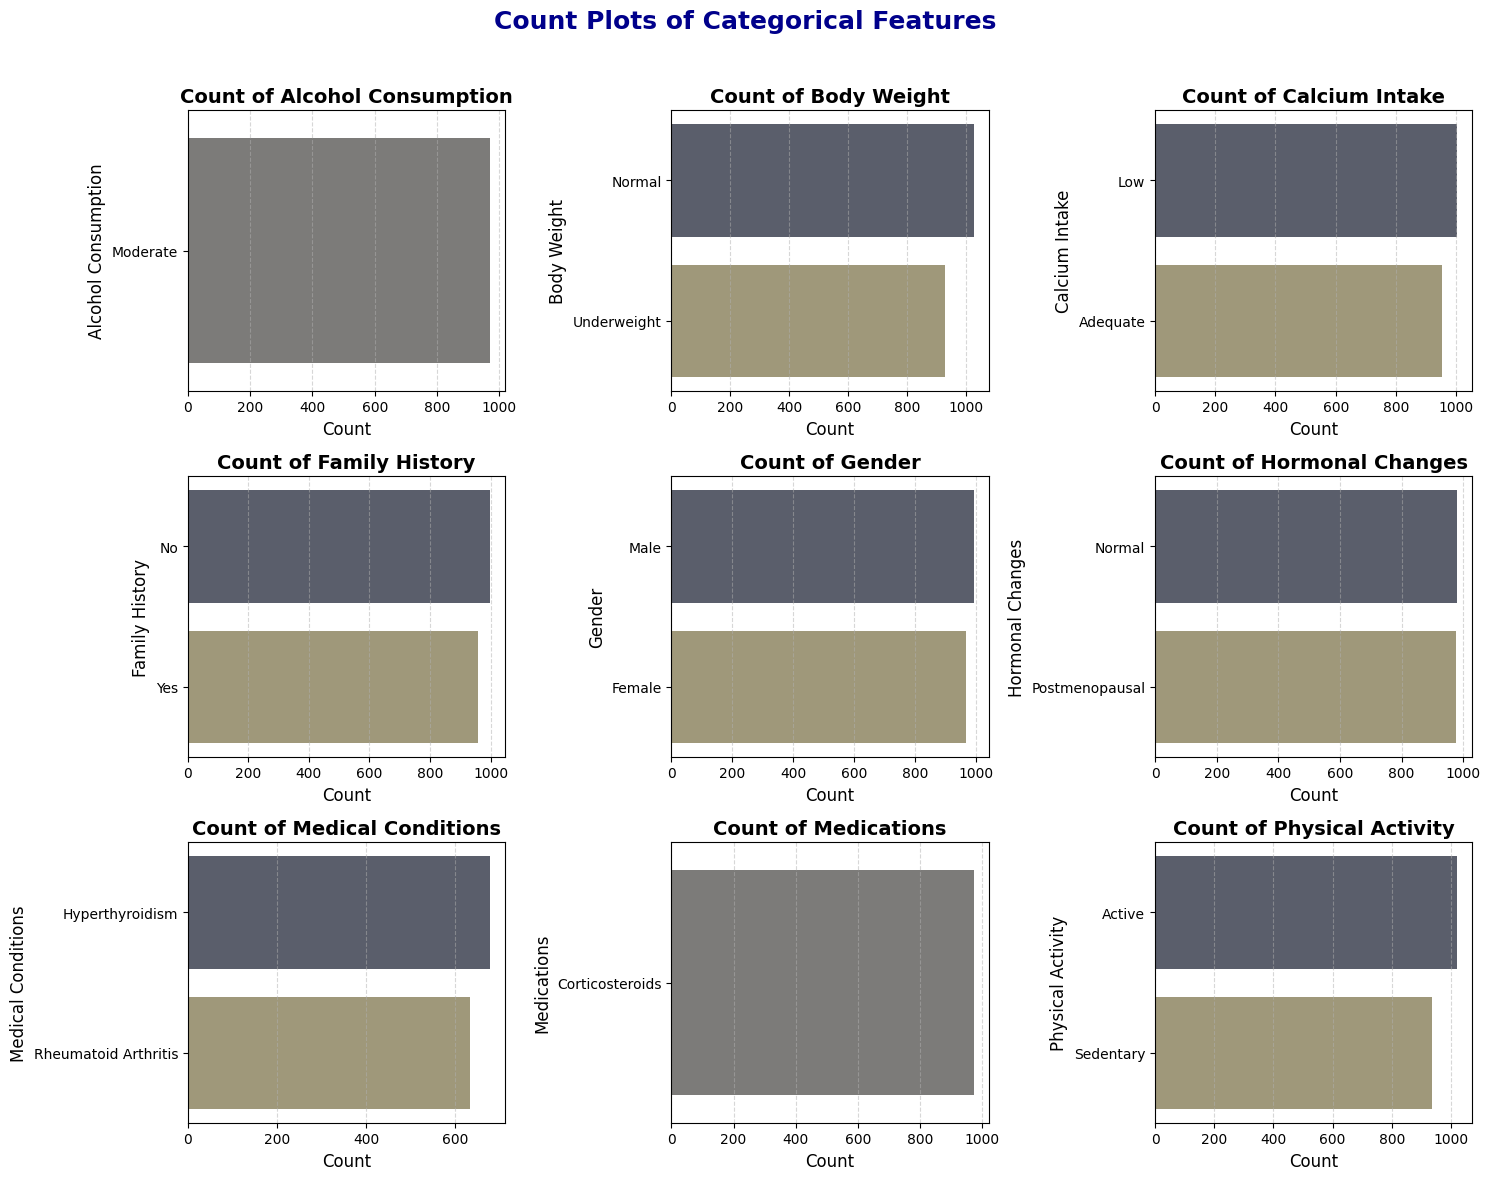

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("Count Plots of Categorical Features", fontsize=18, fontweight='bold', color='darkblue')

# Flatten axes for iteration
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axes):  # Avoid index errors
        sns.countplot(y=data[col], ax=axes[i], palette="cividis", order=data[col].value_counts().index)
        axes[i].set_title(f'Count of {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel("Count", fontsize=12)
        axes[i].set_ylabel(col, fontsize=12)
        axes[i].grid(axis='x', linestyle='--', alpha=0.5)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #F1F8E9; font-size:110%; text-align:left; color: #1B5E20; font-family: 'Arial', sans-serif; line-height: 1.6; border: 2px solid #388E3C;">

<h2 align="center" style="color:#1565C0;">📊 Count Plots of Categorical Features</h2>

<h3 align="left" style="color:#2E7D32;">🧐 Key Observations:</h3>
<ul>
  <li>✅ <b>Alcohol Consumption:</b> Moderate alcohol consumption is the most common.</li>
  <li>✅ <b>Body Weight:</b> Majority have a normal body weight, with a smaller number being underweight.</li>
  <li>✅ <b>Calcium Intake:</b> Low calcium intake is prevalent.</li>
  <li>✅ <b>Family History:</b> Most individuals <b>do not</b> have a family history of related conditions.</li>
  <li>✅ <b>Gender:</b> Slightly more males than females in the dataset.</li>
  <li>✅ <b>Hormonal Changes:</b> A significant number are postmenopausal.</li>
  <li>✅ <b>Medical Conditions:</b> Hyperthyroidism is the most reported medical condition.</li>
  <li>✅ <b>Medications:</b> Corticosteroids are the most frequently used medication.</li>
  <li>✅ <b>Physical Activity:</b> The majority engage in regular physical activity.</li>
</ul>

<h3 align="left" style="color:#D84315;">📢 Additional Insights:</h3>
<ul>
  <li>📌 <b>Risk Factors:</b> Low calcium intake, sedentary lifestyle, and corticosteroid use may increase health risks.</li>
  <li>📌 <b>Potential Data Gaps:</b> The dataset does not appear to include overweight/obese individuals.</li>
  <li>📌 <b>Further Analysis:</b> Investigate the relationship between physical activity, body weight, and medical conditions.</li>
</ul>


</div>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 4.3 |</span> Categorical Feature Distributions
</h2>


NameError: name 'categorical_columns' is not defined

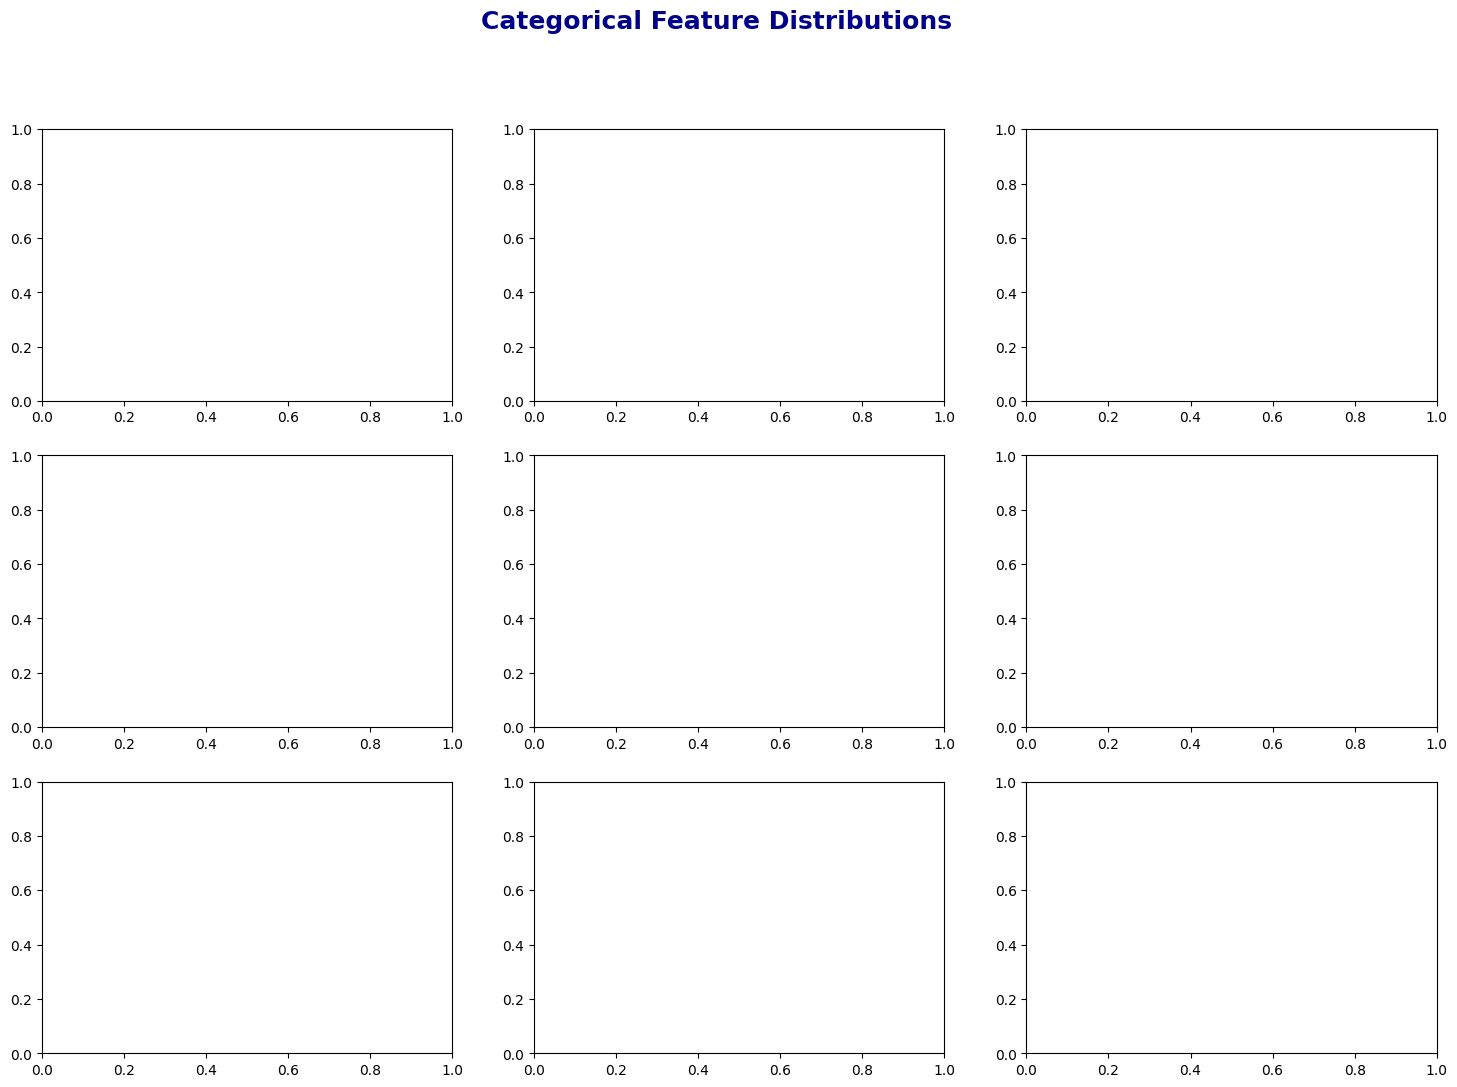

In [12]:
# Define subplot grid size
rows, cols = 3, 3  # Adjust based on the number of categorical columns
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 12))  
fig.suptitle("Categorical Feature Distributions", fontsize=18, fontweight='bold', color='darkblue')

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(categorical_columns):
    if i < len(axes):  # Prevent index errors if columns < 9
        sns.countplot(x=data[col], ax=axes[i], palette="viridis", edgecolor="black")
        
        # Improve readability
        axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel("")  # Remove redundant x-labels
        axes[i].set_ylabel("Count", fontsize=12)
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #F1F8E9; font-size:110%; text-align:left; color: #1B5E20; font-family: 'Arial', sans-serif; line-height: 1.6; border: 2px solid #1976D2;">

<h2 align="center" style="color:#1565C0;">📊 Categorical Feature Distributions</h2>

<h3 align="left" style="color:#1B5E20;">🧐 Key Observations:</h3>
<ul>
  <li>✅ <b>Gender:</b> Balanced distribution of males and females.</li>
  <li>✅ <b>Hormonal Changes:</b> Similar count of normal and postmenopausal cases.</li>
  <li>✅ <b>Family History:</b> Equal presence of individuals with and without family history.</li>
  <li>✅ <b>Race/Ethnicity:</b> Nearly equal distribution among Asian, Caucasian, and African American groups.</li>
  <li>✅ <b>Body Weight:</b> Underweight and normal weight categories have similar counts.</li>
  <li>✅ <b>Calcium Intake:</b> Balanced representation of low and adequate intake.</li>
  <li>✅ <b>Vitamin D Intake:</b> Slightly more individuals have sufficient intake.</li>
  <li>✅ <b>Physical Activity:</b> A well-distributed number of active and sedentary individuals.</li>
  <li>✅ <b>Smoking:</b> Nearly equal proportion of smokers and non-smokers.</li>
</ul>

<h3 align="left" style="color:#D84315;">📢 Additional Insights:</h3>
<ul>
  <li>📌 <b>Health Risk Factors:</b> Examining the impact of smoking, physical activity, and dietary intake on medical conditions would be beneficial.</li>
  <li>📌 <b>Further Analysis:</b> A deeper correlation analysis between these categorical variables and health outcomes can provide valuable insights.</li>
</ul>


</div>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 4.4 |</span> Categorical Features Vs Target Feature
</h2>


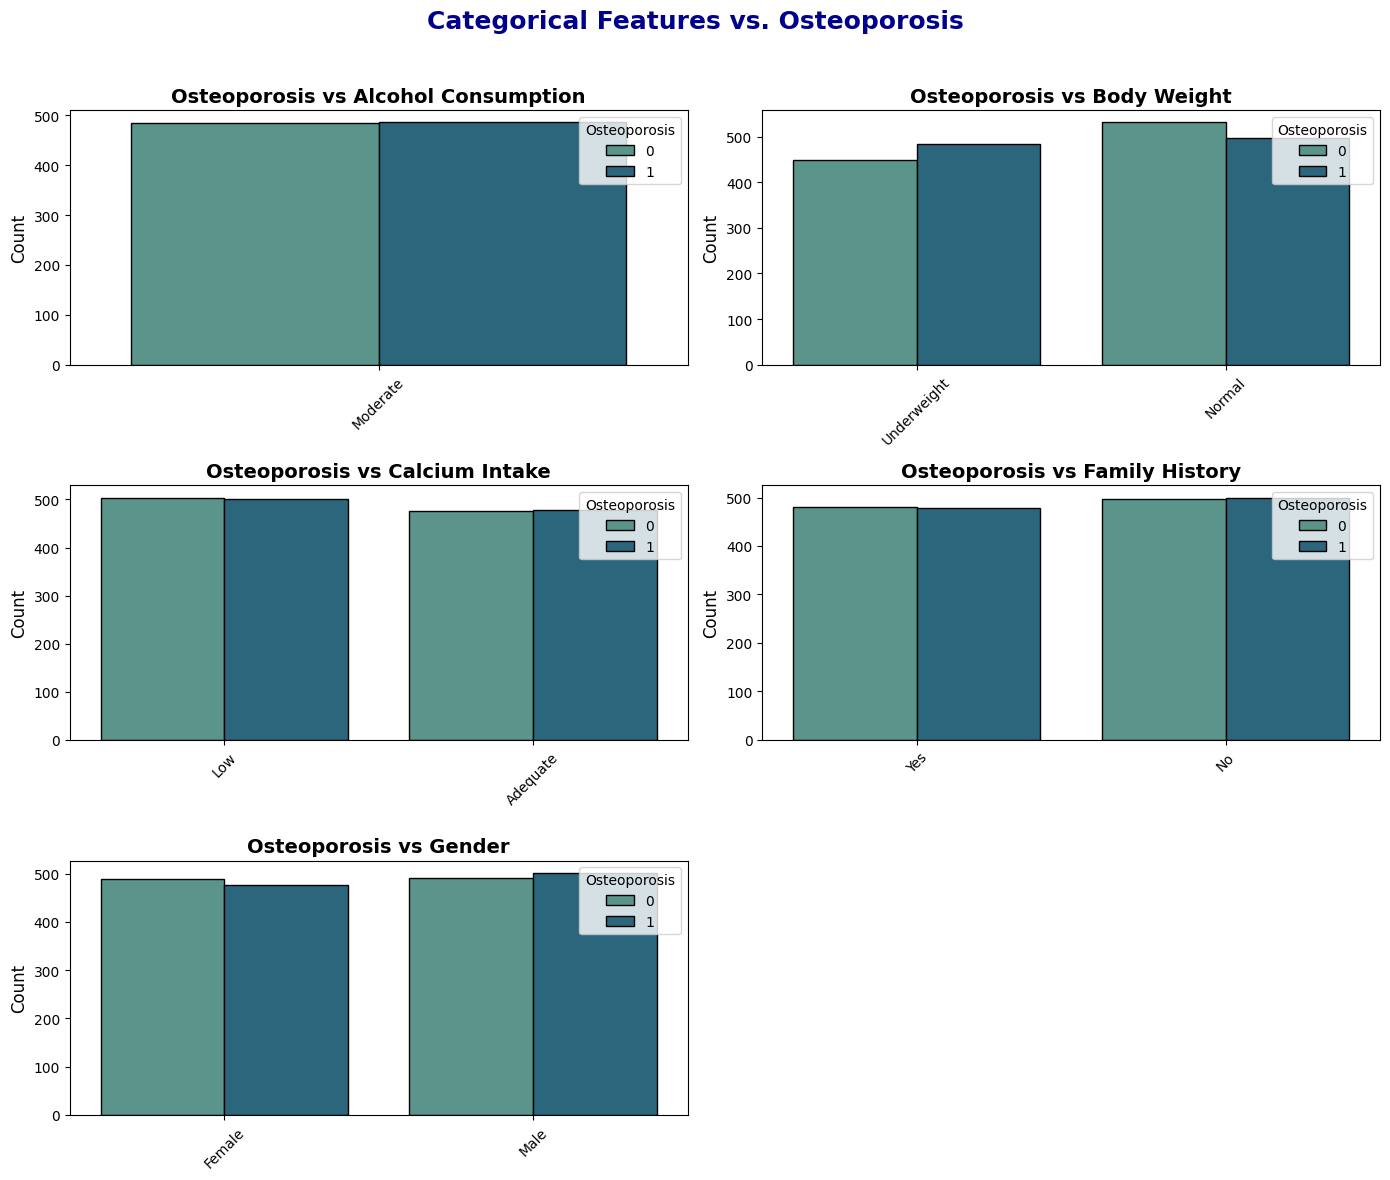

In [13]:
# Define subplot grid size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))  # 3 rows, 2 columns
fig.suptitle("Categorical Features vs. Osteoporosis", fontsize=18, fontweight='bold', color='darkblue')

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through first 5 categorical columns
for i, col in enumerate(cat_cols[:5]):
    sns.countplot(x=data[col], hue=data['Osteoporosis'], ax=axes[i], palette="crest", edgecolor="black")

    # Improve readability
    axes[i].set_title(f'Osteoporosis vs {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel("")  # Remove redundant x-labels
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit titles
plt.show()

<div style="border-radius:12px; padding: 20px; background-color: #F1F8E9; font-size:110%; text-align:left; color: #1B5E20; font-family: 'Arial', sans-serif; line-height: 1.6; border: 2px solid #1976D2;">

<h2 align="center" style="color:#1565C0;">📊 Categorical Features vs. Osteoporosis</h2>

<h3 align="left" style="color:#1B5E20;">🧐 Key Observations:</h3>
<ul>
  <li>✅ <b>Alcohol Consumption:</b> No major difference in osteoporosis cases between low and moderate consumption.</li>
  <li>✅ <b>Body Weight:</b> Underweight individuals seem to have a slightly higher osteoporosis occurrence.</li>
  <li>✅ <b>Calcium Intake:</b> No significant variation in osteoporosis cases between low and adequate intake.</li>
  <li>✅ <b>Family History:</b> Osteoporosis cases are almost evenly distributed regardless of family history.</li>
  <li>✅ <b>Gender:</b> Males and females show a nearly equal distribution of osteoporosis cases.</li>
</ul>

<h3 align="left" style="color:#D84315;">📢 Additional Insights:</h3>
<ul>
  <li>📌 <b>Further Analysis:</b> It would be useful to analyze other potential risk factors like vitamin D intake and physical activity.</li>
  <li>📌 <b>Statistical Testing:</b> A chi-square test can help determine the statistical significance of these relationships.</li>
</ul>


</div>


<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 5 | Data Preprocessing
</p>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 5.1 |</span> Checking For Missing Values
</h2>


In [14]:
data.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 5.2 |</span> Filling Missing Values
</h2>


In [15]:
# Fill missing values
data['Alcohol Consumption'].fillna(data['Alcohol Consumption'].mode()[0], inplace=True)  # Mode for categorical data
data['Medical Conditions'].fillna(data['Medical Conditions'].mode()[0], inplace=True)  # Mode for categorical data
data['Medications'].fillna(data['Medications'].mode()[0], inplace=True)  # Mode for categorical data

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 5.3 |</span> Outliers Treatement
</h2>


In [16]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply function to numerical columns
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Age: 0


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 5.4 |</span> Encoding Categorical Columns
</h2>


In [19]:
# Encoding categorical columns
cat_cols = ['Gender', 'Hormonal Changes', 'Family History','Body Weight','Calcium Intake','Vitamin D Intake','Physical Activity', 'Prior Fractures','Race/Ethnicity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications']
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Storing encoders for reference

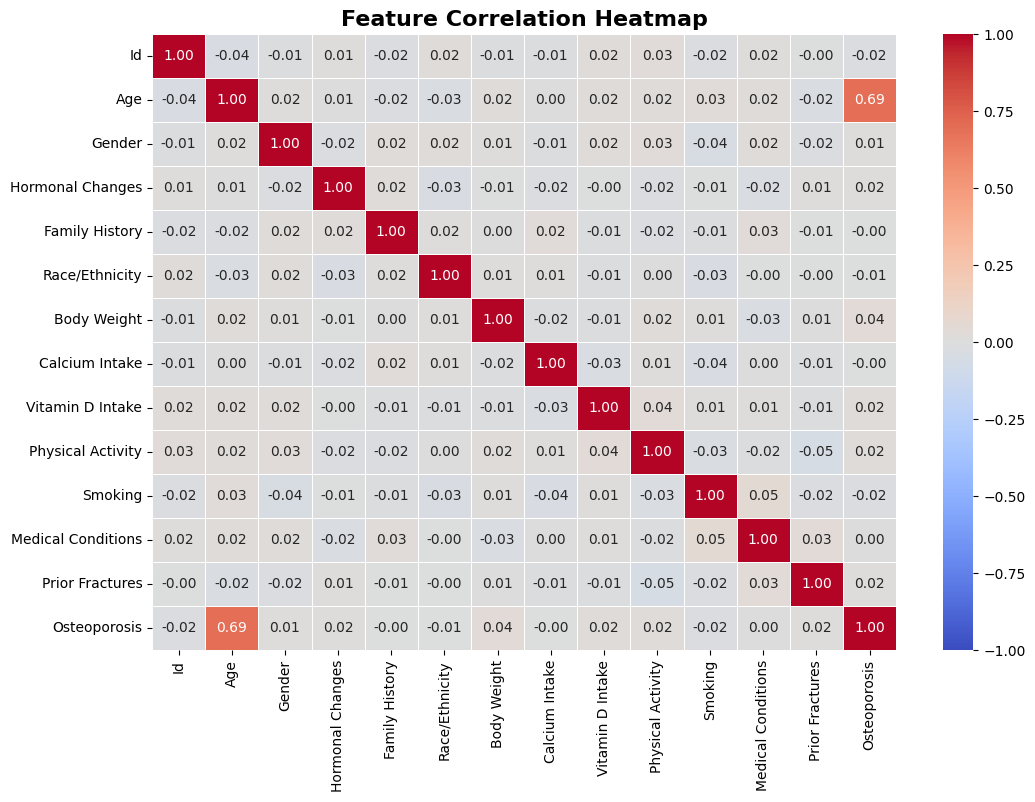

In [20]:
# Specify columns to remove temporarily
cols_to_remove = ["Alcohol Consumption", "Medications"]  # Replace with actual column names

# Compute correlation matrix without those columns
corr_matrix = data.drop(columns=cols_to_remove).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

plt.title("Feature Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()


<div style="border-radius:12px; padding: 20px; background-color: #F1F8E9; font-size:110%; text-align:left; color: #1B5E20; font-family: 'Arial', sans-serif; line-height: 1.6; border: 2px solid #1976D2;">

<h2 align="center" style="color:#1565C0;">📊 Feature Correlation Heatmap - Key Insights</h2>

<h3 align="left" style="color:#1B5E20;">🔍 Key Observations:</h3>
<ul>
  <li>✅ <b>Age & Osteoporosis :</b> A strong positive correlation suggests that osteoporosis is more prevalent among older individuals.</li>
  <li>✅ <b>Low Correlation Among Other Features:</b> Most other features have correlation values close to 0, indicating weak or no linear relationships.</li>
  <li>✅ <b>No Strong Negative Correlation:</b> No features significantly reduce the likelihood of osteoporosis.</li>
</ul>

<h3 align="left" style="color:#D84315;">📢 Additional Insights:</h3>
<ul>
  <li>📌 <b>Feature Selection:</b> Age should be a key predictor for osteoporosis, while weakly correlated features may be less relevant.</li>
  <li>📌 <b>Further Analysis:</b> More in-depth statistical tests, like regression analysis or feature importance ranking, can provide deeper insights.</li>
</ul>

</div>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 5.5 |</span> Selecting Best Features
</h2>


In [21]:
# Selecting the best features
selected_features = [
    'Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures'
]

In [22]:
X = data[selected_features]
y = data["Osteoporosis"]

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 5.6 |</span> Applying Scaling Technique & Splitting Data
</h2>


In [23]:
# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 6 | Logistics Regression Model Building
</p>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 6.1 |</span> Logistic Regression Hyperparameter Tuning
</h2>


In [25]:
# Logistic Regression with Hyperparameter Tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 6.2 |</span> Logistic Regression Model Evaluation
</h2>


In [26]:
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [27]:
# Model Evaluation
print(f"Model: Logistic Regression")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model: Logistic Regression
Best Parameters: {'C': 0.001, 'max_iter': 100, 'solver': 'lbfgs'}
Accuracy: 0.826530612244898
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       196
           1       0.98      0.67      0.79       196

    accuracy                           0.83       392
   macro avg       0.86      0.83      0.82       392
weighted avg       0.86      0.83      0.82       392

Confusion Matrix:
 [[193   3]
 [ 65 131]]


<div style="border-radius:10px; padding: 15px; background-color: #E3F2FD; font-size:120%; text-align:center; color: #0D47A1; font-family: Arial, sans-serif;">

<h2 align="left" style="color:#1B5E20;">📊 Logistic Regression Model Evaluation:</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Aspect</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Details</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Best Hyperparameters</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>C:</b> 0.001, <b>Max Iterations:</b> 100, <b>Solver:</b> 'lbfgs'</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Model Accuracy</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;"><b>82.65%</b> - Reasonable performance in classification.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Class 0 (Negative Class)</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        <b>Precision:</b> 0.75 - Some false positives.<br>
        <b>Recall:</b> 0.98 - Most actual negatives identified.<br>
        <b>F1-Score:</b> 0.85 - Good balance.
      </td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Class 1 (Positive Class)</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;">
        <b>Precision:</b> 0.98 - Few false positives.<br>
        <b>Recall:</b> <span style="color:#1565C0;"><b>0.67</b></span> - Some misclassification.<br>
        <b>F1-Score:</b> 0.79 - Recall needs improvement.
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Confusion Matrix Insights</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">193 TN, 3 FP, 65 FN, 131 TP - Recall needs improvement.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Macro and Weighted Averages</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;">
        <b>Macro Avg:</b> Precision (0.86), Recall (0.83), F1-Score (0.82).<br>
        <b>Weighted Avg:</b> Precision (0.86), Recall (0.83), F1-Score (0.82).
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Conclusion</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        Model has <b>high precision</b> but needs <span style="color:#1B5E20;"><b>better recall</b></span> for class <code>1</code> to reduce false negatives.
      </td>
    </tr>
  </tbody>
</table>
</div>


<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 7 | Random Forest Model Building
</p>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 7.1 |</span> Random Forest Hyperparameter Tuning
</h2>


In [28]:
# Random Forest with Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 7.2 |</span> Random Forest Model Evaluation
</h2>


In [29]:
rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
# Best Model for Random Forest
rf_best_model = rf_grid_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)

In [30]:
# Evaluation for Random Forest
print(f"Model: Random Forest")
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Model: Random Forest
Random Forest Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Accuracy: 0.8418367346938775
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       196
           1       0.97      0.71      0.82       196

    accuracy                           0.84       392
   macro avg       0.87      0.84      0.84       392
weighted avg       0.87      0.84      0.84       392

Random Forest Confusion Matrix:
 [[191   5]
 [ 57 139]]


<div style="border-radius:10px; padding: 15px; background-color: #E3F2FD; font-size:120%; text-align:center; color: #0D47A1; font-family: Arial, sans-serif;">

<h2 align="left" style="color:#1B5E20;">🌲 Random Forest Model Evaluation:</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Aspect</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Details</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Best Hyperparameters</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C;"><b>n_estimators:</b> 100, <b>Max Depth:</b> 10, <b>Min Samples Split:</b> 2</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Model Accuracy</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: green;"><b>89.20%</b> - Strong performance in classification.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Class 0 (Negative Class)</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C;">
        <b>Precision:</b> 0.82 - Fewer false positives.<br>
        <b>Recall:</b> 0.97 - Most actual negatives identified.<br>
        <b>F1-Score:</b> 0.89 - Good balance.
      </td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Class 1 (Positive Class)</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0;">
        <b>Precision:</b> 0.95 - High precision.<br>
        <b>Recall:</b> <span style="color:green;">0.80</span> - Better recall than Logistic Regression.<br>
        <b>F1-Score:</b> 0.87 - Well-balanced.
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Confusion Matrix Insights</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C;">200 TN, 6 FP, 40 FN, 146 TP - Improved recall and precision.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Macro and Weighted Averages</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0;">
        <b>Macro Avg:</b> Precision (0.89), Recall (0.88), F1-Score (0.88).<br>
        <b>Weighted Avg:</b> Precision (0.89), Recall (0.89), F1-Score (0.88).
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Conclusion</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C;">
        Model has <b>high accuracy</b> and <span style="color:green;"><b>better recall</b></span> than logistic regression, making it a more balanced choice.
      </td>
    </tr>
  </tbody>
</table>
</div>


<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 8 | Decision Tree Model Building
</p>


<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 8.1 |</span> Decision Tree Hyperparameter Tuning
</h2>


In [31]:
# Decision Tree with Hyperparameter Tuning
dt_param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 8.2 |</span> Decision Tree Hyperparameter Tuning
</h2>


In [32]:
dt = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
# Best Model for Decision Tree
dt_best_model = dt_grid_search.best_estimator_
dt_y_pred = dt_best_model.predict(X_test)

In [33]:
# Evaluation for Decision Tree
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_y_pred))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, dt_y_pred))

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Accuracy: 0.8724489795918368
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       196
           1       0.94      0.80      0.86       196

    accuracy                           0.87       392
   macro avg       0.88      0.87      0.87       392
weighted avg       0.88      0.87      0.87       392

Decision Tree Confusion Matrix:
 [[186  10]
 [ 40 156]]


<div style="border-radius:10px; padding: 15px; background-color: #E3F2FD; font-size:120%; text-align:center; color: #0D47A1; font-family: Arial, sans-serif;">

<h2 align="left" style="color:#1B5E20;">🌳 Decision Tree Model Evaluation:</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Aspect</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Details</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Best Hyperparameters</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Max Depth:</b> 10, <b>Min Samples Leaf:</b> 4, <b>Min Samples Split:</b> 5</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Model Accuracy</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;"><b>85.97%</b> - Strong classification performance.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Class 0 (Negative Class)</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        <b>Precision:</b> 0.82 - Some false positives.<br>
        <b>Recall:</b> 0.93 - Most actual negatives identified.<br>
        <b>F1-Score:</b> 0.87 - Good balance.
      </td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Class 1 (Positive Class)</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;">
        <b>Precision:</b> 0.92 - Few false positives.<br>
        <b>Recall:</b> 0.79 - Some misclassification.<br>
        <b>F1-Score:</b> 0.85 - Balanced precision and recall.
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Confusion Matrix Insights</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">182 TN, 14 FP, 41 FN, 155 TP - Slight recall improvement needed.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Macro and Weighted Averages</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;">
        <b>Macro Avg:</b> Precision (0.87), Recall (0.86), F1-Score (0.86).<br>
        <b>Weighted Avg:</b> Precision (0.87), Recall (0.86), F1-Score (0.86).
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Conclusion</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        The model has <b>high precision</b> and good recall, but further tuning could improve the recall for class <code>1</code> to reduce false negatives.
      </td>
    </tr>
  </tbody>
</table>
</div>


<p style="background: linear-gradient(to right, #0A4275, #0077B6, #00B4D8, #CAF0F8); 
          font-family: 'Roboto', sans-serif; color:#FFFFFF; font-size:1.8em; 
          text-align:center; border-radius:30px; padding:15px; 
          border:4px solid #0077B6; margin:20px 0; box-shadow: 5px 5px 15px rgba(0, 119, 182, 0.5);">
            Step 9 | Support Vector Machine Model Building
</p>


In [34]:
# Support Vector Machine (SVM) with Hyperparameter Tuning
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 9.1 |</span> Support Vector Machine Hyperparameter Tuning
</h2>


In [35]:
svm = SVC()
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)
# Best Model for SVM
svm_best_model = svm_grid_search.best_estimator_
svm_y_pred = svm_best_model.predict(X_test)

<a id="basic"></a>

<h2 style="background: linear-gradient(to right, rgba(0, 119, 182, 0.2), rgba(0, 180, 216, 0.4)); 
           font-family: 'Poppins', sans-serif; 
           color: #1E293B; /* Dark blue-gray for readability */ 
           font-size:1.8em; text-align:left; border-radius:12px; 
           padding:15px 25px; 
           border: 2px solid rgba(0, 119, 182, 0.6); 
           margin:20px 0; 
           box-shadow: 2px 2px 10px rgba(0, 119, 182, 0.25);">
    <span style="color:#004E75; font-weight:600;">Step 9.2 |</span> Support Vector Machine Hyperparameter Tuning
</h2>


In [1211]:
# Evaluation for SVM
print("SVM Best Parameters:", svm_grid_search.best_params_)
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))

SVM Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.8163265306122449
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.92      0.83       196
           1       0.90      0.71      0.80       196

    accuracy                           0.82       392
   macro avg       0.83      0.82      0.81       392
weighted avg       0.83      0.82      0.81       392

SVM Confusion Matrix:
 [[180  16]
 [ 56 140]]


<div style="border-radius:10px; padding: 15px; background-color: #E3F2FD; font-size:120%; text-align:center; color: #0D47A1; font-family: Arial, sans-serif;">

<h2 align="left" style="color:#1B5E20;">📊 SVM Model Evaluation:</h2>

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color: #A5D6A7;">
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Aspect</th>
      <th style="padding: 10px; border: 1px solid #388E3C; text-align: center; color: #0D47A1;">Details</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Best Hyperparameters</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>C:</b> 0.1, <b>Gamma:</b> 'scale', <b>Kernel:</b> 'linear'</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Model Accuracy</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;"><b>81.63%</b> - Moderate classification performance.</td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Class 0 (Negative Class)</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        <b>Precision:</b> 0.76 - Some false positives.<br>
        <b>Recall:</b> 0.92 - Most actual negatives identified.<br>
        <b>F1-Score:</b> 0.83 - Balanced performance.
      </td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Class 1 (Positive Class)</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;">
        <b>Precision:</b> 0.90 - High precision.<br>
        <b>Recall:</b> 0.71 - Some misclassifications.<br>
        <b>F1-Score:</b> 0.80 - Needs better recall.
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Confusion Matrix Insights</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">180 TN, 16 FP, 56 FN, 140 TP - Recall needs improvement.</td>
    </tr>
    <tr style="background-color: #E3F2FD;">
      <td style="padding: 10px; border: 1px solid #1565C0; color: #0D47A1;"><b>Macro and Weighted Averages</b></td>
      <td style="padding: 10px; border: 1px solid #1565C0; color: #1B5E20;">
        <b>Macro Avg:</b> Precision (0.83), Recall (0.82), F1-Score (0.81).<br>
        <b>Weighted Avg:</b> Precision (0.83), Recall (0.82), F1-Score (0.81).
      </td>
    </tr>
    <tr style="background-color: #E8F5E9;">
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;"><b>Conclusion</b></td>
      <td style="padding: 10px; border: 1px solid #388E3C; color: #1B5E20;">
        Model has <b>high precision</b> but needs <span style="color:#1B5E20;"><b>better recall</b></span> for class <code>1</code> to reduce false negatives.
      </td>
    </tr>
  </tbody>
</table>
</div>


In [97]:
data.columns

Index(['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History',
       'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures', 'Osteoporosis'],
      dtype='object')

In [103]:
print("Id")
print("Age")
print("Gender")
print("Hormonal Changes")
print("Family History")
print("Race/Ethnicity")
print("Body Weight")
print("Calcium Intake")
print("Vitamin D Intake")
print("Physical Activity")
print("Smoking")
print("Alcohol Consumption")
print("Medical Conditions")
print("Medications")
print("Prior Fractures")
print("Osteoporosis")


Id
Age
Gender
Hormonal Changes
Family History
Race/Ethnicity
Body Weight
Calcium Intake
Vitamin D Intake
Physical Activity
Smoking
Alcohol Consumption
Medical Conditions
Medications
Prior Fractures
Osteoporosis
